# Clusterization

## 1. Texts Separation

In [74]:
path = "../../../Texts/text2_3.txt" 

In [87]:
from clusterization import text_segmentation
handle = open(path, 'r')
text = handle.read()
handle.close()
new = text_segmentation(text)
new[:3]

[[(0,
   ' А когда речь заходит о покупке авто на вторичном рынке, то ещё и опасное.'),
  (0, ' Ведь подержанный автомобиль – это всегда «кот в мешке».'),
  (1,
   ' Вопреки описанию и виду, можно «напороться» и на технически неисправную машину, и на битую-перебитую, а порой и на «криминальную».'),
  (1,
   ' Однако добрую часть вариантов можно отсеять ещё на этапе просмотра объявлений, нужно только быть внимательным.')],
 [[(0, ''),
   (1, ' Грамотно составляйте запрос поиска\n'),
   (1,
    'Для того чтобы не тратить время и силы, нужно максимально точно определиться с тем, что, собственно, необходимо приобрести и сколько на покупку имеется денег.')]],
 [(0, ' Если нужен седан, значит, выбираете только седан.'),
  (0,
   ' Если нужна механическая коробка, в условиях поиска ставите «только МКП».'),
  (1,
   ' В идеале, конечно, к моменту составления запроса нужно четко представлять, автомобиль какой марки и модели предполагается к покупке.'),
  (0,
   ' Нужен Рено Логан, значит, смотр

## 2. Experiments With Semantic

In [1]:
import os
import numpy as np
import time
import pickle
from scipy.linalg import block_diag

In [2]:
import gensim
model = gensim.models.KeyedVectors.load_word2vec_format('../../model.bin', binary=True) 
model.init_sims(replace=True)

/home/ased/anaconda3/lib/python3.5/site-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


### 2.1. Trivial Segmentation On Segmented From Programm

In [7]:
import pickle
with open('data_dict.pickle', 'rb') as f:
    data_dict = pickle.load(f)
    f.close()

In [8]:
from clusterization import trivial_segmentation

list_texts, TT, list_tag_ud = trivial_segmentation(path, model,data_dict)

/home/ased/Desktop/PROJECTS/SearchScript/SemanticAnalysis/Experiments/TextsClusters/clusterization.py:91: RuntimeWarning: invalid value encountered in true_divide
  return s/k


In [9]:
for i in list_texts:
    print(i, '\n')

 А когда речь заходит о покупке авто на вторичном рынке, то ещё и опасное. Ведь подержанный автомобиль – это всегда «кот в мешке». Вопреки описанию и виду, можно «напороться» и на технически неисправную машину, и на битую-перебитую, а порой и на «криминальную». 

 Однако добрую часть вариантов можно отсеять ещё на этапе просмотра объявлений, нужно только быть внимательным. 

 Грамотно составляйте запрос поиска
 

Для того чтобы не тратить время и силы, нужно максимально точно определиться с тем, что, собственно, необходимо приобрести и сколько на покупку имеется денег. 

 Если нужен седан, значит, выбираете только седан. 

 Если нужна механическая коробка, в условиях поиска ставите «только МКП». 

 В идеале, конечно, к моменту составления запроса нужно четко представлять, автомобиль какой марки и модели предполагается к покупке. Нужен Рено Логан, значит, смотрим Рено Логан, а не Clio Symbol, Sandero и Polo Sedan до кучи. 

 Имейте в виду, что даже самый «замечательный» б/у автомобиль п

In [10]:
new = list()
for i in list_tag_ud:
    _ = list()
    for j in i:
        _ += j
    new.append(_)
list_tag_ud = new

### 2.2. Union Of Segments

You can see that each segment is linked by one sence and has not some excess sentences. But there are segmentes that should be united. An example of such pairs is the pair of the first and second segments. It is one script step that can be named 'Request Generation'.

In [11]:
D = [(np.linalg.norm(i-TT[ind+1]), list_texts[ind], list_texts[ind+1]) for ind, i in enumerate(TT[:-1])]
D

[(0.39145511719774523,
  ' А когда речь заходит о покупке авто на вторичном рынке, то ещё и опасное. Ведь подержанный автомобиль – это всегда «кот в мешке». Вопреки описанию и виду, можно «напороться» и на технически неисправную машину, и на битую-перебитую, а порой и на «криминальную».',
  ' Однако добрую часть вариантов можно отсеять ещё на этапе просмотра объявлений, нужно только быть внимательным.'),
 (0.5216020129300578,
  ' Однако добрую часть вариантов можно отсеять ещё на этапе просмотра объявлений, нужно только быть внимательным.',
  ' Грамотно составляйте запрос поиска\n'),
 (0.49975429724579123,
  ' Грамотно составляйте запрос поиска\n',
  'Для того чтобы не тратить время и силы, нужно максимально точно определиться с тем, что, собственно, необходимо приобрести и сколько на покупку имеется денег.'),
 (0.5197614053842909,
  'Для того чтобы не тратить время и силы, нужно максимально точно определиться с тем, что, собственно, необходимо приобрести и сколько на покупку имеется д

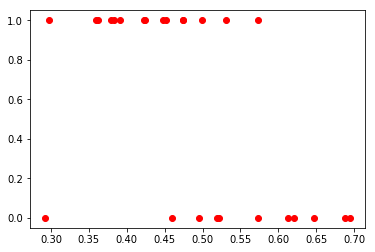

In [12]:
marks =[1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,0,0,1,1, ]
x = [i[0] for i in D]
for ind, i in enumerate(x):
    if np.isnan([i]).any():
        x[ind] = max(x)
import matplotlib.pyplot as plt
% matplotlib inline
plt.plot(x, marks, 'ro')

In such classification we can see that there is some spread of classes on segment [0.45,0.60]. The optimal bound is equal to 0.455.

In [13]:
from clusterization import union
list_texts, text_vectors = union(list_texts, TT)

In [14]:
for i in list_texts:
    print('NEW SEGMENT\n',i,'\n')

NEW SEGMENT
  А когда речь заходит о покупке авто на вторичном рынке, то ещё и опасное. Ведь подержанный автомобиль – это всегда «кот в мешке». Вопреки описанию и виду, можно «напороться» и на технически неисправную машину, и на битую-перебитую, а порой и на «криминальную». Однако добрую часть вариантов можно отсеять ещё на этапе просмотра объявлений, нужно только быть внимательным. 

NEW SEGMENT
  Грамотно составляйте запрос поиска
 

NEW SEGMENT
 Для того чтобы не тратить время и силы, нужно максимально точно определиться с тем, что, собственно, необходимо приобрести и сколько на покупку имеется денег. 

NEW SEGMENT
  Если нужен седан, значит, выбираете только седан. 

NEW SEGMENT
  Если нужна механическая коробка, в условиях поиска ставите «только МКП». 

NEW SEGMENT
  В идеале, конечно, к моменту составления запроса нужно четко представлять, автомобиль какой марки и модели предполагается к покупке. Нужен Рено Логан, значит, смотрим Рено Логан, а не Clio Symbol, Sandero и Polo Sedan

In [15]:
D = list()
for ind, i in enumerate(text_vectors[:-1]): 
    D.append((np.linalg.norm(i - text_vectors[ind+1]), list_texts[ind], list_texts[ind+1]))
D

[(0.5112797529653994,
  ' А когда речь заходит о покупке авто на вторичном рынке, то ещё и опасное. Ведь подержанный автомобиль – это всегда «кот в мешке». Вопреки описанию и виду, можно «напороться» и на технически неисправную машину, и на битую-перебитую, а порой и на «криминальную». Однако добрую часть вариантов можно отсеять ещё на этапе просмотра объявлений, нужно только быть внимательным.',
  ' Грамотно составляйте запрос поиска\n'),
 (0.49975429724579123,
  ' Грамотно составляйте запрос поиска\n',
  'Для того чтобы не тратить время и силы, нужно максимально точно определиться с тем, что, собственно, необходимо приобрести и сколько на покупку имеется денег.'),
 (0.5197614053842909,
  'Для того чтобы не тратить время и силы, нужно максимально точно определиться с тем, что, собственно, необходимо приобрести и сколько на покупку имеется денег.',
  ' Если нужен седан, значит, выбираете только седан.'),
 (0.5737727013233624,
  ' Если нужен седан, значит, выбираете только седан.',
  ' 

## 3. Classification

In [1]:
import pickle
with open('MarkedTexts.pickle', 'rb') as f:
    d = pickle.load(f)
    f.close

In [2]:
import numpy as np
data = list()
for i in d:
    data += i
data_dict = dict()
for i in data:
    if data_dict.__contains__(i[2]):
        data_dict[int(i[2])] += 1
    else:
        data_dict[int(i[2])] = 1
_ = [key for key in data_dict if data_dict[key]<6] + [12]
data_copy = data.copy()
data = [(i[0],i[1],int(i[2])) for i in data if not int(i[2]) in _]
size_train = 0.8
print('Distribution', data_dict)
print('Ignore List', _)
print('Size data', len(data))
print('Size train',size_train)

Distribution {0: 12, 1: 6, 2: 16, 3: 15, 4: 33, 5: 9, 6: 22, 7: 224, 8: 25, 9: 17, 10: 1, 11: 8, 12: 96}
Ignore List [10, 12]
Size data 387
Size train 0.8


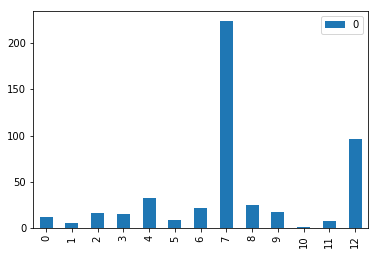

In [5]:
import pandas
%matplotlib inline
from collections import Counter
df = pandas.DataFrame.from_dict(data_dict, orient='index')
df.plot(kind='bar')

#### Distances Distribution

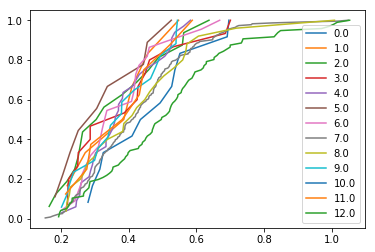

In [14]:
vectors = [i[1] for i in data_copy]
center = sum(vectors)/len(vectors)
new = dict()
for i in data_copy:
    if new.__contains__(i[2]):
        new[i[2]].append(i[1])
    else:
        new[i[2]] = [i[1]]
distances = {key:[np.linalg.norm(center-i) for i in new[key]] for key in new}
keys = new.keys()
import matplotlib.pyplot as plt
%matplotlib inline
for key in keys:
    distances[key].sort()
    y = [(ind+1)/len(distances[key]) for ind, i in enumerate(distances[key])]
    plt.plot(distances[key], y)
plt.legend(keys)
plt.show()

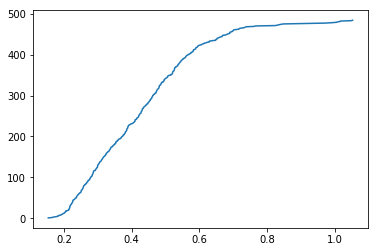

In [6]:
vectors = [i[1] for i in data_copy]
center = sum(vectors)/len(vectors)
distances = [np.linalg.norm(center-i) for i in vectors]
distances.sort()
y = [ind+1 for ind,i in enumerate(distances)]
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(distances, y)
plt.show()

#### Visualisation

ERROR:root:Line magic function `%matplotlin` not found.


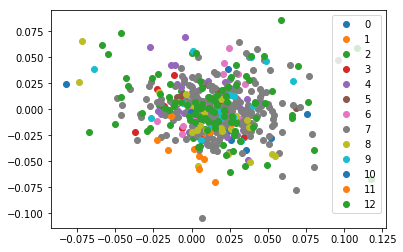

In [7]:
from sklearn.decomposition import PCA
X = np.array([i[1] for i in data_copy])
Y = [int(i[2]) for i in data_copy]
classes = list({int(i):None for i in Y}.keys())
pca = PCA(n_components = 2)
X_new = pca.fit_transform(X)
import matplotlib.pyplot as plt
%matplotlin inline
for cur in classes:
    plt.plot([X[ind,0] for ind,i in enumerate(Y) if i==cur],
             [X[ind,1] for ind,i in enumerate(Y) if i==cur], 'o')
plt.legend(classes)
plt.show()

### 3.1. Trivial Classification

In current section we will determine class of text on the nearest center of class that was got from training data.

In [169]:
import random
def trivial(train, test):
    data_dict = dict()
    for i in train:
        if data_dict.__contains__(i[2]):
            data_dict[int(i[2])].append(i[1])
        else:
            data_dict[int(i[2])] = [i[1]]
    centers = {i:sum(data_dict[i])/len(data_dict[i]) for i in data_dict}
    answers = list()
    for i in test:
        _ = {j:np.linalg.norm(centers[j]-i[1]) for j in centers}
        answer = None
        for key in _.keys():
            if answer is None or _[answer]>_[key]:
                answer = key
        answers.append(answer)
    return answers

In [170]:
def get_sets(data, size_train, all_data):
    res = {}
    for i in data:
        if res.__contains__(i[2]):
            res[i[2]].append(i)
        else:
            res[i[2]] = [i]
    train = list()
    for i in res:
        cur = int(size_train*len(res[i]))
        train+=res[i][:cur]
    test=list()
    if all_data:
        for i in res:
            test+=res[i]
    else:
        for i in res:
            cur = int(size_train*len(res[i]))
            test+=res[i][cur:]
    return train,test

In [171]:
def metric(results, arg = 13):
    D = np.zeros((arg, arg))
    def update(some_dict, key):
        if some_dict.__contains__(key):
            some_dict[key] += 1
        else:
            some_dict[key]=1
    TP, FP, FN = {}, {}, {}
    acc = 0
    _ = dict()
    for i in results:
        D[i[0], i[1]] += 1
        if i[0]==i[1]:
            acc+=1
        _[i[0]] = None
        _[i[1]] = None
        if i[0]==i[1]:
            update(TP, i[1])
        else:
            update(FP, i[1])
            update(FN, i[0])
    for i in _.keys():
        if not TP.__contains__(i):
            TP[i]=0
        if not FP.__contains__(i):
            FP[i]=0
        if not FN.__contains__(i):
            FN[i]=0
    precision, recall = {}, {}
    for i in _.keys():
        try:
            precision[i] = TP[i]/(TP[i]+FP[i])
        except Exception:
            precision[i]=0
        try:
            recall[i] = TP[i]/(TP[i]+FN[i])
        except Exception:
            recall[i]=0
    return precision, recall, acc/len(results), D
            
def test_method(data, size_train,repeat,classificator=trivial, arg = 13, all_data = False):
    prec, recall, acc = dict(), dict(), 0
    D = np.zeros((arg,arg))
    for i in range(repeat):
        shuffled_data=data.copy()
        random.shuffle(shuffled_data)
        train, test = get_sets(shuffled_data, size_train, all_data)
        answers = classificator(train, test)
        results = [(i[2], answers[ind]) for ind,i in enumerate(test)]
        cur_prec, cur_recall, cur_acc, cur_D = metric(results, arg)
        for i in cur_prec:
            if prec.__contains__(i):
                prec[i]+=(cur_prec[i]/repeat)
            else:
                prec[i]=cur_prec[i]/repeat
        for i in cur_recall:
            if recall.__contains__(i):
                recall[i]+=(cur_recall[i]/repeat)
            else:
                recall[i]=cur_recall[i]/repeat
        acc+=(cur_acc/repeat)
        D += cur_D/repeat
    return prec, recall, acc, D

#### Results On Tested Data

In [172]:
prec, recall, acc, D = test_method(data, size_train, 1000)
print('Accuracy', acc)
keys = list(prec.keys())
keys.sort()
print('Key\tPrec\tRecall')
for key in keys:
    print("%.f\t%.2f\t%.2f"%(key, prec[key],recall[key]))

Accuracy 0.5240609756097551
Key	Prec	Recall
0	0.20	0.16
1	0.00	0.00
2	0.37	0.41
3	0.17	0.46
4	0.43	0.41
5	0.02	0.05
6	0.34	0.36
7	0.87	0.64
8	0.28	0.41
9	0.42	0.48
11	0.78	0.85


In [173]:
D = D[keys].T[keys].T
import pandas as pd
pd.DataFrame(D,
            columns = keys,
            index = keys)

,0,1,2,3,4,5,6,7,8,9,11
0,0.479,0.485,0.119,0.338,0.038,0.400,0.052,0.438,0.020,0.628,0.003
1,0.550,0.000,0.587,0.368,0.024,0.036,0.046,0.278,0.000,0.078,0.033
2,0.018,0.183,1.655,0.287,0.132,0.691,0.083,0.258,0.000,0.450,0.243
3,0.028,0.041,0.032,1.383,0.381,0.196,0.389,0.402,0.001,0.147,0.000
4,0.063,0.093,0.101,1.274,2.890,0.286,1.343,0.823,0.090,0.037,0.000
5,0.028,0.030,0.428,0.249,0.041,0.108,0.909,0.157,0.000,0.050,0.000
6,0.117,0.045,0.189,0.671,0.822,1.161,1.797,0.004,0.000,0.194,0.000
7,0.411,0.554,0.647,3.320,2.413,1.172,0.769,29.005,5.253,1.107,0.349
8,0.158,0.007,0.206,0.182,0.073,0.068,0.068,1.883,2.057,0.298,0.000
9,0.351,0.016,0.659,0.429,0.020,0.275,0.009,0.124,0.208,1.904,0.005


#### Results On All Data Data

In [174]:
prec, recall, acc, D = test_method(data, size_train, 1000, all_data = True)
print('Accuracy', acc)
keys = list(prec.keys())
keys.sort()
print('Key\tPrec\tRecall')
for key in keys:
    print("%.f\t%.2f\t%.2f"%(key, prec[key],recall[key]))

Accuracy 0.6349405684754521
Key	Prec	Recall
0	0.64	0.61
1	0.45	0.57
2	0.52	0.64
3	0.26	0.63
4	0.51	0.50
5	0.25	0.45
6	0.51	0.57
7	0.92	0.66
8	0.40	0.61
9	0.53	0.66
11	0.72	0.87


In [175]:
D = D[keys].T[keys].T
import pandas as pd
pd.DataFrame(D,
            columns = keys,
            index = keys)

,0,1,2,3,4,5,6,7,8,9,11
0,7.293,0.862,0.156,0.450,0.049,0.812,0.073,0.960,0.011,1.329,0.005
1,0.567,3.404,0.850,0.617,0.026,0.050,0.084,0.270,0.000,0.097,0.035
2,0.050,0.528,10.174,0.916,0.122,1.171,0.199,1.007,0.000,0.841,0.992
3,0.107,0.054,0.077,9.381,1.154,0.441,0.936,1.999,0.001,0.850,0.000
4,0.236,0.309,0.334,5.251,16.577,1.218,5.540,3.020,0.429,0.086,0.000
5,0.041,0.034,1.030,1.093,0.112,4.043,1.862,0.608,0.000,0.177,0.000
6,0.309,0.106,0.548,2.311,2.789,2.608,12.580,0.002,0.000,0.747,0.000
7,2.148,2.820,3.271,15.997,11.269,5.718,3.535,148.827,23.333,5.334,1.748
8,0.375,0.024,0.966,0.889,0.181,0.264,0.347,5.196,15.342,1.416,0.000
9,0.777,0.044,2.202,1.136,0.036,0.925,0.017,0.295,0.413,11.152,0.003


### 3.2. Classification: SVM

In [176]:
X = np.array([i[1] for i in data])
Y = [int(i[2]) for i in data]
classes = list({int(i):None for i in Y}.keys())
transformed_data = [(None, i, Y[ind]) for ind,i in enumerate(X)]
import random
random.shuffle(transformed_data)
train, test = get_sets(transformed_data, 0.8, False)

(387, 600)


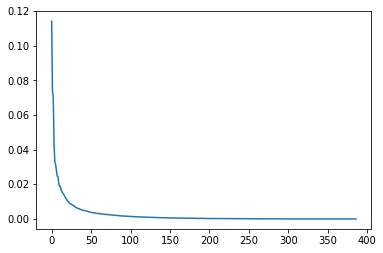

In [188]:
X = np.array([i[1] for i in transformed_data])
print(X.shape)
%matplotlib inline
from sklearn.decomposition import PCA
pca = PCA(n_components = min(X.shape))
pca.fit(X)
res = pca.explained_variance_ratio_
plt.plot([ind for ind, i in enumerate(res)], res)
plt.show()

In [201]:
from sklearn import svm
repeat = 100
res = dict()
for n in range(repeat):
    random.shuffle(transformed_data)
    train, test = get_sets(transformed_data, 0.8, False)
    for j in range(0, 5):
        clf = svm.SVC(C = 10**(j-2), gamma = 3, degree = 2, coef0 =2.5,kernel='poly')
        # clf = svm.SVC(gamma = j, kernel='rbf')# 0.6919
        # clf = svm.SVC(gamma = 4, coef0 = j, kernel='sigmoid')
        X = np.array([i[1] for i in train])
        #X = np.hstack((X, X*np.sqrt(np.absolute(X))))
        clf.fit(X, np.array([i[2] for i in train]))
        if res.__contains__(j):
            X = np.array([i[1] for i in test])
            #X = np.hstack((X, X*np.sqrt(np.absolute(X))))
            res[j] += clf.score(X, np.array([i[2] for i in test]))
        else:
            X = np.array([i[1] for i in test])
            #X = np.hstack((X, X*np.sqrt(np.absolute(X))))
            res[j] = clf.score(X, np.array([i[2] for i in test]))
res = {i:res[i]/repeat for i in res}
keys = list(res.keys())
keys.sort()
for i in keys:
    print(10**(i-2), res[i])

0.01 0.5487804878048769
0.1 0.5587804878048781
1 0.6271951219512196
10 0.5964634146341465
100 0.5952439024390247


In [202]:
from sklearn import svm
repeat = 100
prec, recall, acc = dict(), dict(), 0

for n in range(repeat):
    random.shuffle(transformed_data)
    train, test = get_sets(transformed_data, 0.8, False)
    clf = svm.SVC(gamma = 3, degree = 2, coef0 = 2.5,kernel='poly')
    clf.fit(np.array([i[1] for i in train]), np.array([i[2] for i in train]))
    pred = clf.predict(np.array([i[1] for i in test]))
    results = [(i[2], pred[ind]) for ind,i in enumerate(test)]
    cur_prec, cur_recall, cur_acc, cur_D = metric(results)
    for i in cur_prec:
        if prec.__contains__(i):
            prec[i]+=(cur_prec[i]/repeat)
        else:
            prec[i]=cur_prec[i]/repeat
    for i in cur_recall:
        if recall.__contains__(i):
            recall[i]+=(cur_recall[i]/repeat)
        else:
            recall[i]=cur_recall[i]/repeat
    acc+=(cur_acc/repeat)
print('Accuracy', acc)
keys = classes
keys.sort()
print('Key\tPrec\tRecall')
for key in keys:
    print("%.f\t%.2f\t%.2f"%(key, prec[key],recall[key]))

Accuracy 0.6257317073170736
Key	Prec	Recall
0	0.39	0.28
1	0.00	0.00
2	0.33	0.22
3	0.22	0.12
4	0.49	0.46
5	0.05	0.03
6	0.42	0.41
7	0.71	0.92
8	0.21	0.09
9	0.33	0.26
11	0.61	0.45


### Clussification: NN

In [4]:
import keras
from keras.utils import np_utils

Using TensorFlow backend.


In [5]:
X = np.array([i[1] for i in data])
Y = [int(i[2]) for i in data]
classes = list({int(i):None for i in Y}.keys())
transformed_data = [(None, i, Y[ind]) for ind,i in enumerate(X)]
import random
random.shuffle(transformed_data)
blocks, test =get_sets1(transformed_data, 1., 10)

NameError: name 'get_sets1' is not defined